# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 3_Data Plotting and Visualization

## 1. Visual principles & plotting



**Contents of this note refer to 1) Dr. Joe Anderson's teaching materials; 2) textbook "Data Science from Scratch"; 3) https://www.w3schools.com/python/numpy/default.asp**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

## Visual principles

Please refer to the PDF file (COSC311_Module3_1_Visual Principles.pdf)

## matplotlib and Graph types


matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

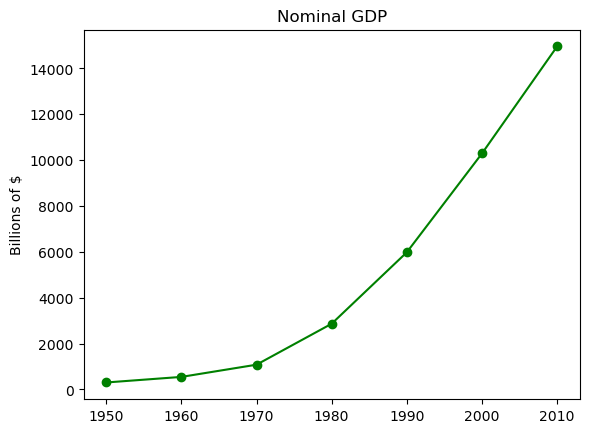

In [1]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
# https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
# matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

# matplotlib.pyplot.show(*, block=None)
# Display all open figures.
plt.show()

# if you want to save this figure as a file, comment out line plt.show() and uncomment the following line 
# plt.savefig('viz_gdp.png')


## Bar charts

A good choice when you want to show how some quantity varies among some discrete set of items.

The following example shows how many Academy Awards were won by each of a variety of movies:

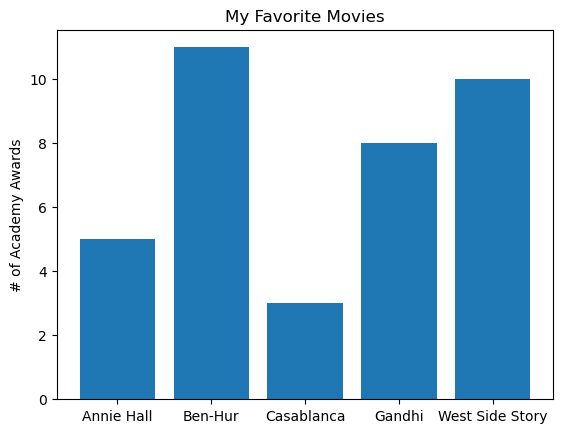

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()


Before introducing the next example, let's look at the Counter class in collections module.

### Counter class in collections module

A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.

In [3]:
from collections import Counter

In [4]:
xs = [1,2,3,4,3,2,3,1,2,1,1,2,3,2]

In [5]:
counts = Counter(xs)

In [6]:
counts

Counter({1: 4, 2: 5, 3: 4, 4: 1})

In [7]:
counts.keys()

dict_keys([1, 2, 3, 4])

In [8]:
counts.values()

dict_values([4, 5, 4, 1])

In [9]:
max(counts.values())

5

In [10]:
counts.items()

dict_items([(1, 4), (2, 5), (3, 4), (4, 1)])

In [11]:
[x[0] for x in counts.items() if x[1] == max(counts.values())]

[2]

In [12]:
x = []
for val, count in counts.items():
    if count == max(counts.values()):
#         x += [val]
        x.append(val)
x

[2]

In [13]:
sorted([1,2,3,4,3,2,3,1,2,1,1,2,3,2])

[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4]

In [14]:
len([1,2,3,4,3,2,3,1,2,1,1,2,3,2])

14

### Another example for bar chart
Bar chart can also be a good choice for plotting histograms of bucketed numeric values to show how the values are distributed.

In [ ]:
# The collection Module in Python provides different types of containers. 
# A Container is an object that is used to store different objects and provide a way to 
# access the contained objects and iterate over them. Some of the built-in containers are 
# Tuple, List, Dictionary, etc. 
# https://www.geeksforgeeks.org/python-collections-module/

from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
print(histogram)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()



## Line chart

Line chart is a good choice to show the trends

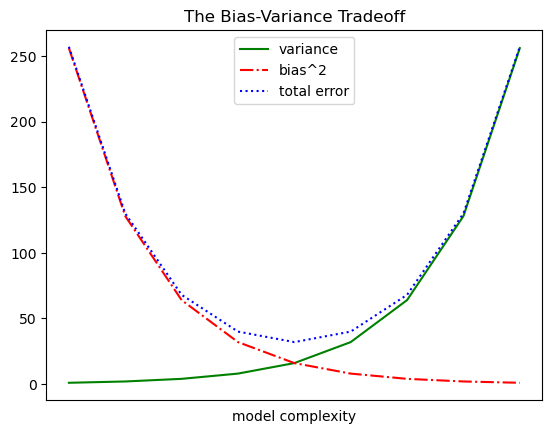

In [1]:
from matplotlib import pyplot as plt

variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256] # LIST
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1] # LIST

# https://www.geeksforgeeks.org/zip-in-python/
# zip - combines 2 things into one object
# In the 1 object each is a tuple 

# List can not do addition 
# Adds x + y together - just the sum 
total_error  = [x + y for x, y in zip(variance, bias_squared)] # LIST


# https://www.geeksforgeeks.org/enumerate-in-python/
# Will add a counter to an iterable and returns it in the form
# of enumerating 
# Will turn into Tuple - (index, 'name')
# prints -> [0, 1, 2, 3, 4, 5, 6, 7, 8]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()


## Scatterplots

A scatterplot is a good choice to show the relationship between two paired sets of data.

The following figure shows the relationship between the number of friends your users have and the number of minutes they spend on the site every day:

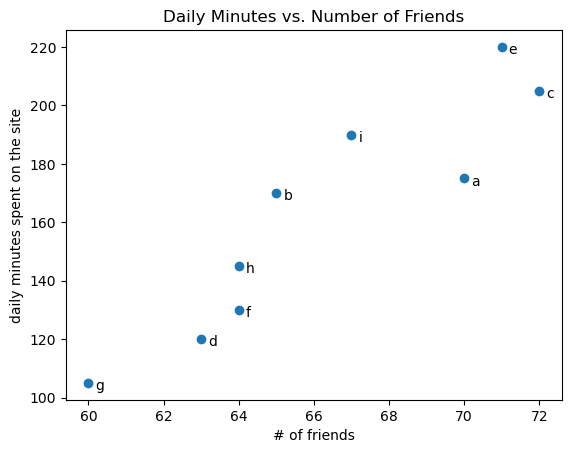

In [2]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): # Combines together 
    plt.annotate(label, # Adds label -> xy()
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset -> 5 right, 5 down
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

# Each point is 1 user -> label for each user

## Subplot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

The following example refers to https://matplotlib.org/stable/tutorials/introductory/pyplot.html

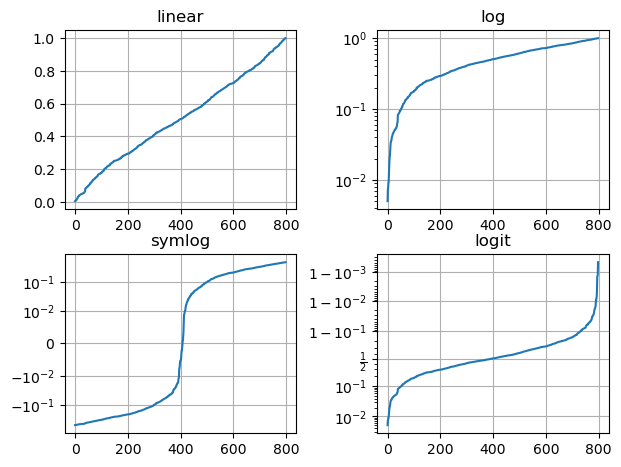

In [3]:
from matplotlib import pyplot as plt
import numpy as np

# Fixing random state for reproducibility
# Used for the random number generator 
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
# Points follow normal distribution
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
# Only need to keep points 0-1
y = y[(y > 0) & (y < 1)]
y.sort() # Sort by ascending number
x = np.arange(len(y)) # Arrange- generate list that is a sequence
# ^ X is as long as how many points you have

# plot with various axes scales
plt.figure()

# linear
# Subplot- subfigure
# 2 rows, 2 columns, First figure
plt.subplot(2, 2, 1)  # equivalent: plt.subplot(221)
plt.plot(x, y) # Line figure
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(2, 2, 3)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(2, 2, 4)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Data plotting example: adult dataset

The adult dataset: https://archive.ics.uci.edu/ml/datasets/adult

This example refers to Dr. Joe Anderson's teaching materials

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [12]:
adults = pd.read_csv('adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [6]:
adults.head() # First 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adults[:5]['education'] == 'Bachelors' # Tell me which rows have a bach -> return False if not 

0     True
1     True
2    False
3    False
4     True
Name: education, dtype: bool

In [13]:
adults[:1]['age'] == 39 # Goes to rows 0-1 and prints true if they are 39

0    True
Name: age, dtype: bool

In [9]:
adults.info() # How many columns, name, how many samples, if something is empty, and the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot: >

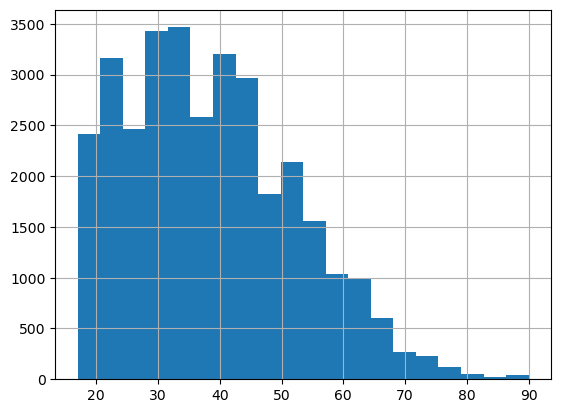

In [10]:
# histogram the ages of these adults?
# to ask what does the distribution of ages look like?

# Select age columns and split into 20 bars
adults['age'].hist(bins=20)

<AxesSubplot: title={'center': 'Age v Income'}, xlabel='Age', ylabel='Income'>

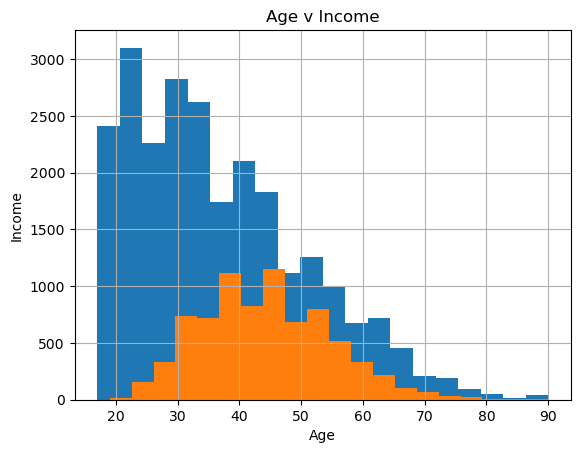

In [17]:
# compare the ages of the two income classes
# Compare income 
# Select tuples with income <=50k
adults['age'][adults['income'] == '<=50K'].hist(bins=20)
plt.title("Age v Income")
plt.xlabel("Age")
plt.ylabel("Income")
# Select tuples with income > 50k
adults['age'][adults['income'] == '>50K'].hist(bins=20)

<AxesSubplot: >

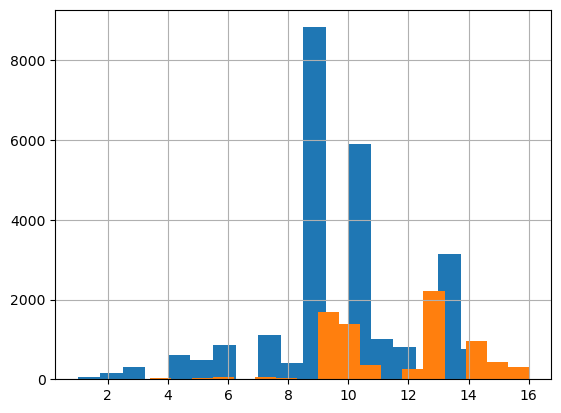

In [18]:
adults['education-num'][adults['income'] == '<=50K'].hist(bins=20)
adults['education-num'][adults['income'] == '>50K'].hist(bins=20)

In [19]:
# Shows statistics
adults.describe() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
adults[['education-num', 'education']]\
[(adults['education'] == 'HS-grad') & (adults['education-num'] == 9)]

,education-num,education
2,9,HS-grad
7,9,HS-grad
16,9,HS-grad
17,9,HS-grad
21,9,HS-grad
...,...,...
32547,9,HS-grad
32557,9,HS-grad
32558,9,HS-grad
32559,9,HS-grad


In [21]:
adults['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [23]:
ys = adults.groupby('education')[['education-num','hours-per-week']].mean().sort_values('education-num')['hours-per-week']
print(ys)

education
Preschool       36.647059
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
10th            37.052519
11th            33.925957
12th            35.780600
HS-grad         40.575374
Some-college    38.852284
Assoc-voc       41.610709
Assoc-acdm      40.504217
Bachelors       42.614006
Masters         43.836332
Prof-school     47.425347
Doctorate       46.973366
Name: hours-per-week, dtype: float64


ys[Preschool] is 36.64705882352941
ys[1st-4th] is 38.25595238095238
ys[5th-6th] is 38.8978978978979
ys[7th-8th] is 39.36687306501548
ys[9th] is 38.04474708171206
ys[10th] is 37.052518756698824
ys[11th] is 33.92595744680851
ys[12th] is 35.78060046189376
ys[HS-grad] is 40.575373773926295
ys[Some-college] is 38.85228363736113
ys[Assoc-voc] is 41.61070911722142
ys[Assoc-acdm] is 40.504217432052485
ys[Bachelors] is 42.614005602240894
ys[Masters] is 43.83633197910621
ys[Prof-school] is 47.42534722222222
ys[Doctorate] is 46.973365617433416


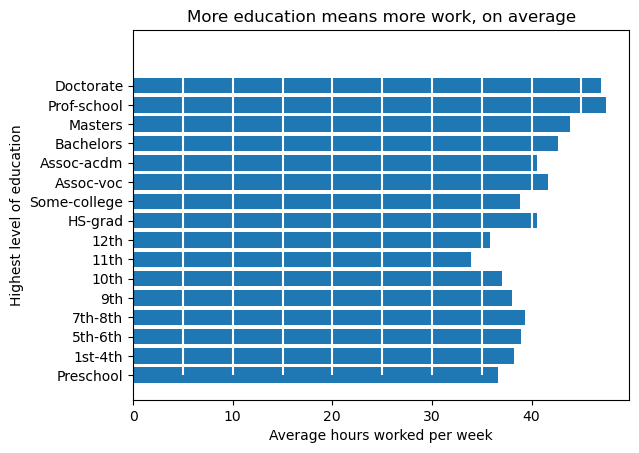

In [22]:
# Group based on education 
ys = adults.groupby('education')[['education-num','hours-per-week']].mean().sort_values('education-num')['hours-per-week']

for level in ys.keys():
    print(f'ys[{level}] is {ys[level]}')

plt.barh(ys.keys(), ys)
plt.title('More education means more work, on average')
plt.xlabel('Average hours worked per week')
plt.ylabel('Highest level of education')
plt.vlines([i for i in range(5,50,5)], ymin=0, ymax=17, colors='white')

In [24]:
# gets the max of the series of ages for all adults having a B.S. level education
adults[adults['education'] == 'Bachelors']['age'].max()

90

In [25]:
# Stats for education - age stats 
ys = adults.groupby('education')['age'].describe()
ys

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


In [26]:
some = adults.head()
some

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
some.sort_values('education-num')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
some.groupby('education')[['education-num','age']].max().sort_values('education-num')

,education-num,age
education,,
11th,7,53
HS-grad,9,38
Bachelors,13,50


In [29]:
ys = adults.groupby('education')[['education-num','hours-per-week']].mean().sort_values('education-num')['hours-per-week']

print(ys)

education
Preschool       36.647059
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
10th            37.052519
11th            33.925957
12th            35.780600
HS-grad         40.575374
Some-college    38.852284
Assoc-voc       41.610709
Assoc-acdm      40.504217
Bachelors       42.614006
Masters         43.836332
Prof-school     47.425347
Doctorate       46.973366
Name: hours-per-week, dtype: float64


[Text(0.5, 1.0, 'Higher Education means higher average work hours')]

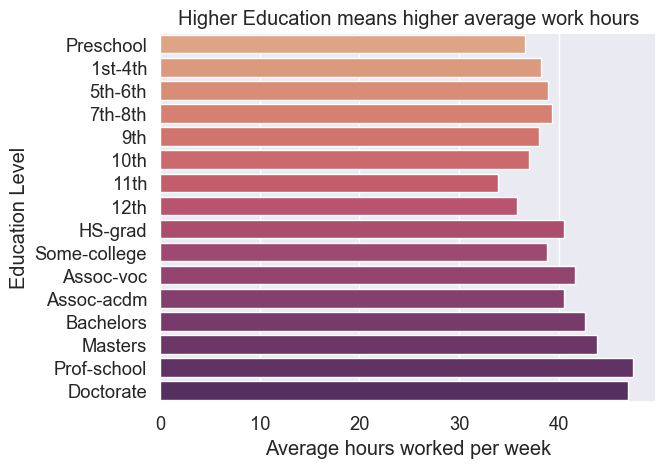

In [39]:
# need to import seaboarn for this
# may need to pip install seaborn first or install seaborn in Anaconda Navigator

import seaborn as sb
sb.set_theme(font_scale=1.2, font='Sans-serif')

ax = sb.barplot(x=ys, y=ys.keys(), orient="h", palette='flare') # Flare is a grandulated color paltette/scheme 
# horizontal- a lot of words (will mix together if on the x-axis)

ax.set(xlabel='Average hours worked per week')
ax.set(ylabel='Education Level')
ax.set(title='Higher Education means higher average work hours')